# $k$-means clustering (theory)
On friday the k-means clustering problem was introduced. 

<b>Question 1 (a): </b>What is the objective of $k$-means clustering problem? 

<b>Question 1 (b): </b>Rewrite the objective for $\text{dist}(x,y)=||x-y||$

For finding a (locally) optimal solution to the $k$-means clustering problem Lloyd's algorithm was introduced. Let $x_1,...,x_n\in \mathbb{R}^d$. The algorithm has two steps

- while improving:
  - Update centroid: For $i=1,...,k$ let $\mu_i = \frac{1}{|C_i|} \sum_{x\in C_i}x$
  - Update clustering: Assign $x_i$ to cluster $C_j$ where $j=\arg \min ||x-\mu_j||^2$ for $i=1,..., n$


<b>Question 2: </b>Consider the image below. What are the centroids? Can you interpret the cost visually?

<img src="http://dovgalecs.com/blog/wp-content/uploads/2012/11/untitled.jpg" style="width: 200px; height:auto" />

<b>Question 3: </b>What is the running time of Lloyds algorithm? Let $T$ be the number of iterations, $n$ number of data points, $d$ dimension of the datapoints and $k$ the number of clusters. 

<b>Question 4: </b>Does Lloyd's algorithm provide any guarantees for finding the optimal solution?

<b>Question 5: </b>Can a cluster of a $k$-means clustering be empty? 

<b>Question 6: </b>Why do we choose the mean in each cluster in the 'Update centroid' step of the algorithm? 

HINT: Try differentiate objective function and solve for equal zero.  

<b>Question 7: </b>Is Lloyd's algorithm guaranteed to converge?

HINT: How many different clusterings are there? Finite/Infinite? Could Lloyd's algorithm find the same clustering twice? Does the cost decrease/increase between iterations?

<b>Bonus Point: </b>
It is important that you realize there is a different between the $k$-means clustering problem and Lloyd's algorithm. Lloyd's algorithm is sometimes refered to as "the $k$-means algorithm" due to its extensive use. This might make it a bit confusing to distinguish between problem and algorithm. 

# $k$-means clustering (code)
In this exercise you must implement Lloyd's algorithm. To test our implementation we will need data. For this we will use the Iris dataset similar to the book [ZM]. The data set has three clases so we <i>cheat</i> by setting $k=3$

In [1]:
# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k = 3
print(X.shape)

(150, 2)


## Implementing Lloyds algorithm
The following implementation of Lloyd's algorithm is similar to the previous pseudo-code, except we added printing and stopping.

- for i=1,...,T:
  - Update centroid: For $i=1,...,k$ let $\mu_i = \frac{1}{|C_i|} \sum_{x\in C_i}x$
  - Update clustering: Assign $x_i$ to cluster $C_j$ where $j=\arg \min ||x-\mu_j||^2$
  - Compute and print cost of current clustering
  - If cost didn't improve from last iteration stop

Your job is to implement the two update operations. They are marked in the code as usual. One thing that might be a bit confusing is that clusterings are represented as a $n$-dimensional array `clustering`. If the point $x_i$ should be in cluster $j$ we have that `clustering[i]=j`.  

In [20]:
import numpy as np

def lloyds_algorithm(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i].
        centroids:  The centroids/average points of each cluster. 
        cost:       The cost of the clustering 
    """
    n, d = X.shape
    
    # Initialize clusters random. 
    clustering = np.random.randint(0, k, (n, )) 
    centroids  = np.zeros((k, d))
    
    # Used to stop if cost isn't improving (decreasing)
    cost = 0
    oldcost = 0
    
    # Column names
    print("Iterations\tCost")
    
    for i in range(T):
        
        # Update centroid
        
        # YOUR CODE HERE
        for c in range(k): # loop over clusters
            indices = np.where(clustering == c)
            centroids[c] = np.sum(X[indices], axis=0) / len(X[indices])
        # END CODE

        
        # Update clustering 
        
        # YOUR CODE HERE
        for x_i, x in enumerate(X): # loop over data
            j = 0
            d = np.inf
            for c in range(k): # loop over clusters
                if np.linalg.norm(x - centroids[c]) < d:
                    j = c
                    d = np.linalg.norm(x - centroids[c]) ** 2
            clustering[x_i] = j
        # END CODE
        
        
        # Compute and print cost
        cost = 0
        for j in range(n):
            cost += np.linalg.norm(X[j] - centroids[clustering[j]])**2    
        print(i+1, "\t\t", cost)
        # fast alternative: cost = np.sum((X - centroids[clustering])**2) 
        
        # Stop if cost didn't improve more than epislon (decrease)
        if np.isclose(cost, oldcost): break #TODO
        oldcost = cost
        
    return clustering, centroids, cost

clustering, centroids, cost = lloyds_algorithm(X, 3, 100)
#print(X)
print(clustering)

Iterations	Cost
1 		 119.19156737915758
2 		 48.89912256875907
3 		 38.706632213365495
4 		 38.595038991550226
5 		 38.595038991550226
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 2 0 2 2 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 0 0]


The random initialization sometimes causes the algorithm to get stuck at different local minimum. This causes different runs to get different scores. In practice this is usually handled by running the algorithm several times and picking the best run. 

The following code runs Lloyd's algorithm 50 times and plots the score of each run. Because the data set is fairly small, $n=150$, most of the runs will get the same score. Try change the number of clusters from $3$ to $10$. What happens? 

<IPython.core.display.Javascript object>


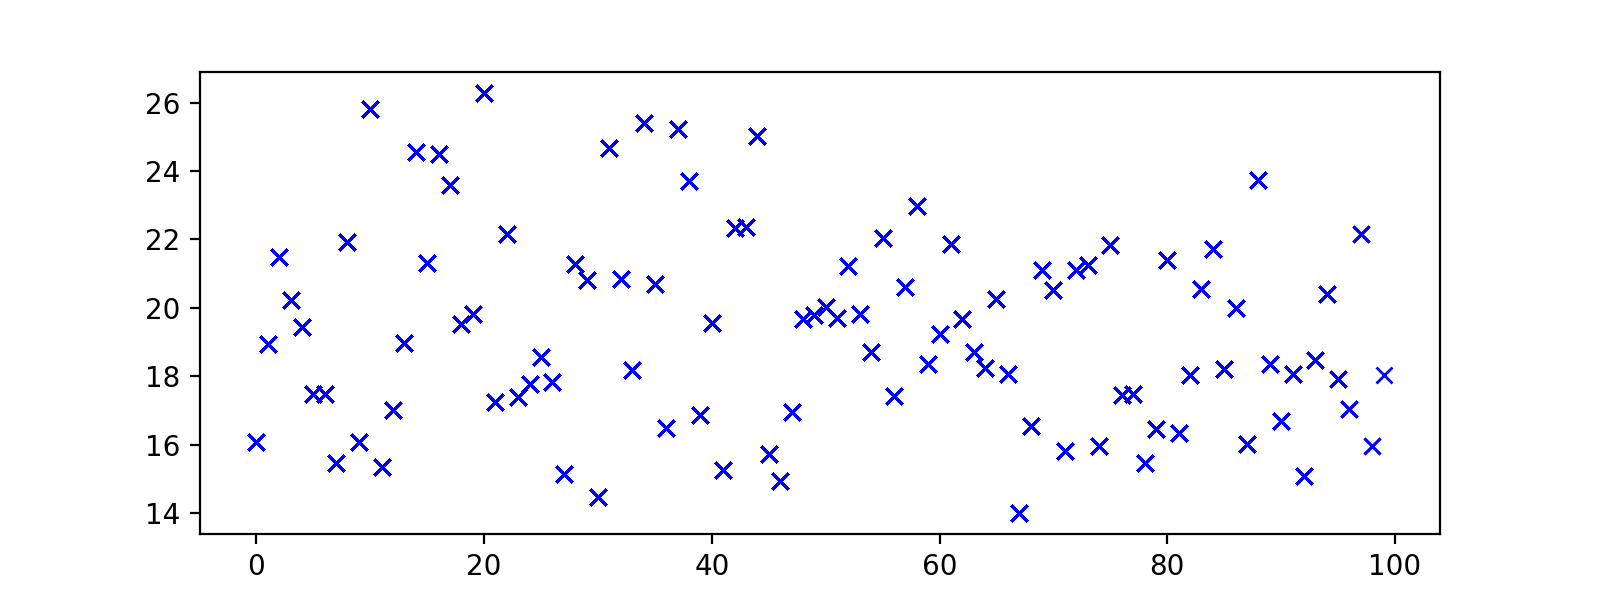

Iterations	Cost
1 		 100.16170941907215
2 		 21.73983773107782
3 		 19.966971778609206
4 		 17.68117388355275
5 		 17.34690730953351
6 		 16.930290098440356
7 		 16.573803905918165
8 		 15.98622656114339
9 		 16.097328043396846


/Users/au597881/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


10 		 16.073352933973236
11 		 16.073352933973236
Iterations	Cost
1 		 53.13407043134593
2 		 20.37139358367081
3 		 19.863649428655812
4 		 18.994449715328518
5 		 19.212634225630424
6 		 19.058742024185705
7 		 18.94407745598239
8 		 18.94407745598239
Iterations	Cost
1 		 99.63205066152938
2 		 32.011367078594134
3 		 22.025706150002385
4 		 22.010540282795407
5 		 21.563584783323993
6 		 21.499693598750994
7 		 21.499693598750994
Iterations	Cost
1 		 98.17994196428576
2 		 43.616830670283235
3 		 29.69646617302952
4 		 23.833706716289612
5 		 21.156435168672353
6 		 20.12563053869682
7 		 20.559206171881875
8 		 20.243400745818516
9 		 20.243400745818516
Iterations	Cost
1 		 107.89069100015367
2 		 30.735357492122873
3 		 24.57493103489517
4 		 20.391221702444547
5 		 19.09157284064447
6 		 19.04779917787036
7 		 19.253631000999615
8 		 19.49622585561736
9 		 19.44734727917755
10 		 19.44734727917755
Iterations	Cost
1 		 70.24294896451212
2 		 23.777145739578867
3 		 18.523014340851

2 		 27.700102339249497
3 		 21.983705750864633
4 		 22.22697574418582
5 		 21.284092612922194
6 		 20.84650278293136
7 		 20.922321494657968
8 		 20.725617467615457
9 		 20.68844298967941
10 		 20.68844298967941
Iterations	Cost
1 		 67.12045730275197
2 		 19.968842714763653
3 		 18.70707154474755
4 		 19.21291844135801
5 		 18.850922273860007
6 		 18.119668740973594
7 		 16.99672329136066
8 		 17.41616769920054
9 		 16.898511091891415
10 		 16.604749950927246
11 		 17.191701901912282
12 		 16.56104074094989
13 		 16.492563567460603
14 		 16.492563567460603
Iterations	Cost
1 		 68.60686226702545
2 		 25.29306862832873
3 		 23.045690925040248
4 		 23.416819073600962
5 		 23.614158902152848
6 		 24.43122470069314
7 		 25.03450451388889
8 		 25.231131756624215
9 		 25.79146813225933
10 		 25.920819991512673
11 		 26.095661848072574
12 		 25.827392247918482
13 		 25.277698166223033
14 		 25.082174428141347
15 		 25.24649529607442
16 		 25.235969696969683
17 		 25.235969696969683
Iterations

Iterations	Cost
1 		 103.75583085176804
2 		 28.43293202913869
3 		 22.209906315653377
4 		 20.877589141900597
5 		 20.563812934824185
6 		 20.624886588459418
7 		 19.66365855506562
8 		 20.076140003655162
9 		 18.972078386501675
10 		 18.534259289867606
11 		 18.628335077620793
12 		 18.71432854077741
13 		 18.70783325370282
14 		 18.70783325370282
Iterations	Cost
1 		 85.30335941614769
2 		 27.334038820673502
3 		 21.136979335908194
4 		 17.84902323506219
5 		 18.106796327499666
6 		 18.305123926446132
7 		 18.253725991722956
8 		 18.253725991722956
Iterations	Cost
1 		 96.6247309223609
2 		 22.24450196729734
3 		 20.597664387755103
4 		 20.306566479683884
5 		 20.26983432539685
6 		 20.26983432539685
Iterations	Cost
1 		 69.38995010944191
2 		 30.88533769981824
3 		 22.566694753914195
4 		 22.00685244229737
5 		 19.954635507032044
6 		 19.510174936077156
7 		 18.512203868162647
8 		 17.655602635844527
9 		 18.196909281994415
10 		 17.987533740833168
11 		 18.114590460666328
12 		 18

3 		 18.449092993289547
4 		 18.852924785546886
5 		 18.99558569947566
6 		 18.841111066420883
7 		 18.59769514301448
8 		 18.13843233495008
9 		 18.057688390313395
10 		 18.057688390313395
Iterations	Cost
1 		 87.24007197916592
2 		 18.972092183085028
3 		 16.84303192986636
4 		 16.210916745493872
5 		 15.40870299964506
6 		 14.269892674038447
7 		 14.237953662436048
8 		 14.101787559248224
9 		 14.535181716123947
10 		 14.781239297461903
11 		 14.985405013857402
12 		 15.160390652097215
13 		 15.082353041695146
14 		 15.082353041695146
Iterations	Cost
1 		 79.96423416488881
2 		 27.02980764248072
3 		 19.375931866754343
4 		 18.80612928312874
5 		 18.478441296479577
6 		 18.34634534892516
7 		 18.5359057931498
8 		 18.66579519867701
9 		 18.70378480740941
10 		 18.485275341186988
11 		 18.472744477744484
12 		 18.472744477744484
Iterations	Cost
1 		 85.63533856767542
2 		 23.08727514213763
3 		 22.672820162554704
4 		 22.372793645763544
5 		 22.15338199109234
6 		 21.568773507966522


In [22]:
%matplotlib notebook 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8,3))    
costs = []

for i in range(100):
    _, _, cost = lloyds_algorithm(X, 10, 100) # Try change number of clusters from 3 to 10. 
    costs.append(cost)
    ax.plot(costs, 'bx')
    fig.canvas.draw()

To check your implementation you should run <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">sklearns</a> implementation of Lloyds algorithm. By default the implementation repeats the algorithm $10$ times and picks the best result. A sanity check for your implementation of Lloyd's algorithm is to check that the scores are roughly the same. 

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print(-kmeans.score(X))

37.12370212765935


To get a visual understanding of the algorithm, the following code visualizes each step of the algorithm. Just copy and paste the answer from your implementation from above and run.

<IPython.core.display.Javascript object>


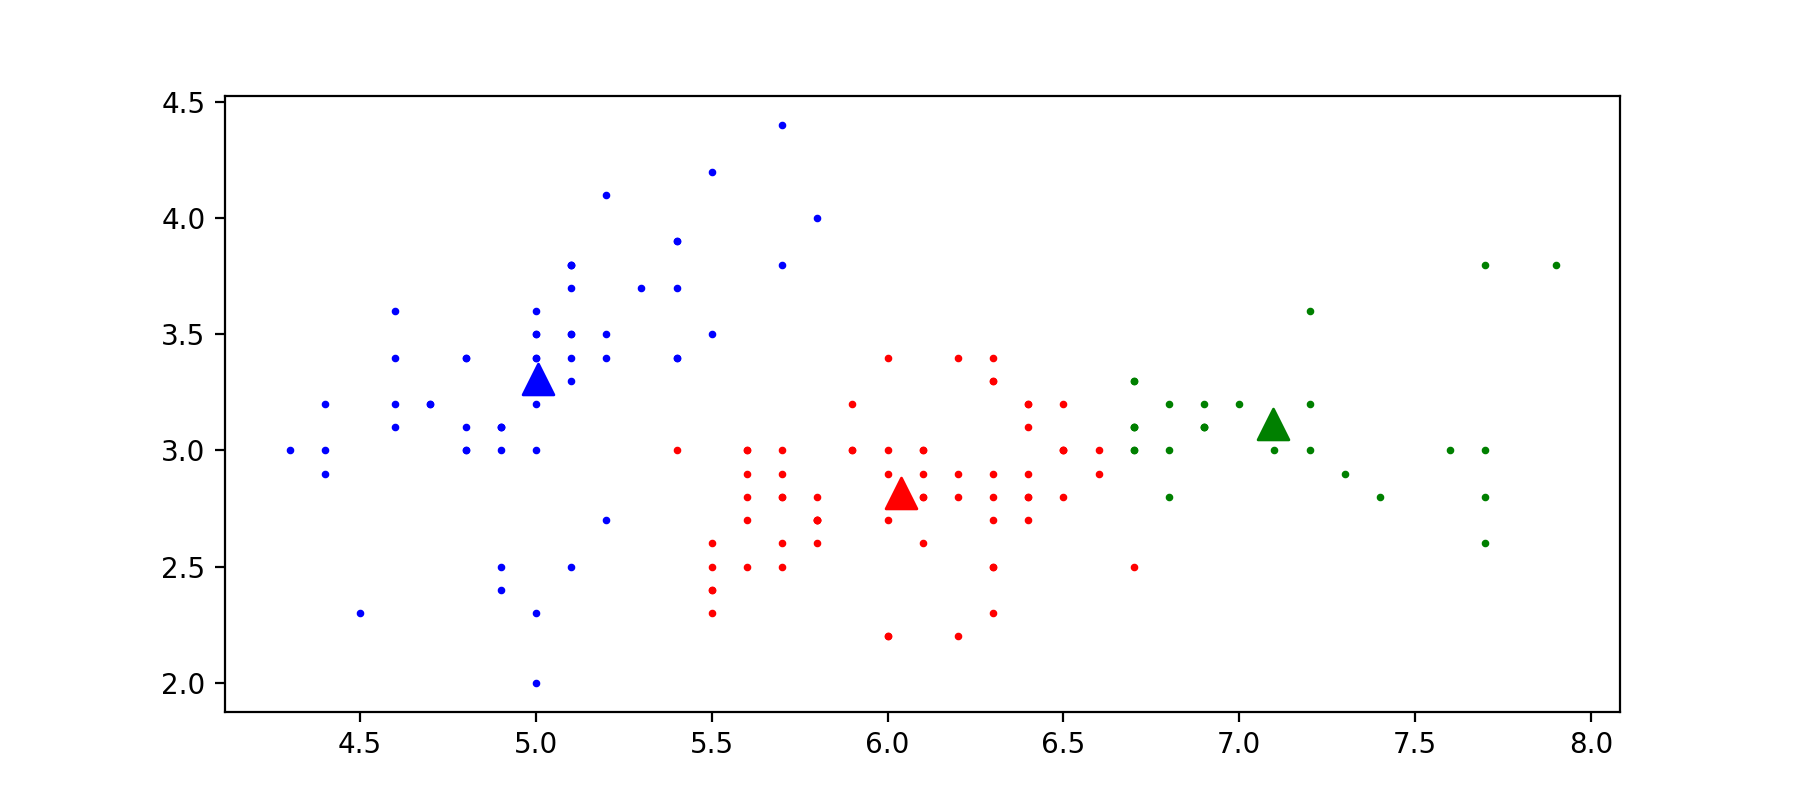

Iteration	Cost
1 		 123.24865576106096
2 		 58.533004287189925
3 		 39.101074131679546
4 		 39.100456302644865
5 		 38.612946786863084
6 		 38.595038991550226
7 		 38.595038991550226


In [26]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import time

def lloyds_algorithm_visualize(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
        The data is assumed to have dimension 2 and each step of the algorithm is visualized. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i]. 
    """
    n, d = X.shape
    
    assert d == 2, "The data is assumed to have dimension 2 so we can visualize it. "
    
    # Initialize clusters random. 
    clustering = np.random.randint(0, k, (n, )) 
    centroids  = np.zeros((k, d))
    
    # Used to stop if cost isn't improving (decreasing)
    cost = 0
    oldcost = 0
    
    # Initialize subplot for visualization
    fig, ax = plt.subplots(1, 1, figsize=(9,4)) 
    ax.axis('off')
    colors = ["r", "g", "b"]
    
    # Column names
    print("Iteration\tCost")
    
    for i in range(T):
        
        # Update centroid
        
        # YOUR CODE HERE
        for c in range(k): # loop over clusters
            indices = np.where(clustering == c)
            centroids[c] = np.sum(X[indices], axis=0) / len(X[indices])
        # END CODE

        
        # Update clustering 
        
        # YOUR CODE HERE
        for x_i, x in enumerate(X): # loop over data
            j = 0
            d = np.inf
            for c in range(k): # loop over clusters
                if np.linalg.norm(x - centroids[c]) < d:
                    j = c
                    d = np.linalg.norm(x - centroids[c]) ** 2
            clustering[x_i] = j
        # END CODE
        
        
        # Draw clusters
        ax.cla()
        for j in range(k):
            centroid = centroids[j]
            c = colors[j]
            ax.scatter(centroid[0], centroid[1], s=123, c=c, marker='^')
            data = X[clustering==j]
            x = data[:,0]
            y = data[:,1]
            ax.scatter(x, y, s=3, c=c)
            
        fig.canvas.draw()
        time.sleep(1)
        
        # Compute and print cost
        cost = 0
        for j in range(n):
            cost += np.linalg.norm(X[j] - centroids[clustering[j]])**2    
        print(i+1, "\t\t", cost)
        
        
        # Stop if cost didn't improve (decrease)
        if np.isclose(cost, oldcost): break #TODO
        oldcost = cost
        
    return clustering, centroids, cost

clustering, centroids, cost = lloyds_algorithm_visualize(X, 3, 100)

## Evaluating the clustering using silhuette coefficient
In the lecture it was discussed how one can compare different clusterings. In this exercise we try to implement one of these comparison techniques.

In [28]:
def silhouette(data, clustering): # give figure at TA session
    n, d = data.shape

    # YOUR CODE HERE
    s=...
    # END CODE

    return s
print(X)
print(clustering)
#silhouette(X, clustering)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

What is the running time of computing the Silhouette coefficient?

## Using clustering for image compression data
In this exercise you must use Lloyd's algorithm for image compression. The following code downloads and displays the two images we will consider: 

<IPython.core.display.Javascript object>


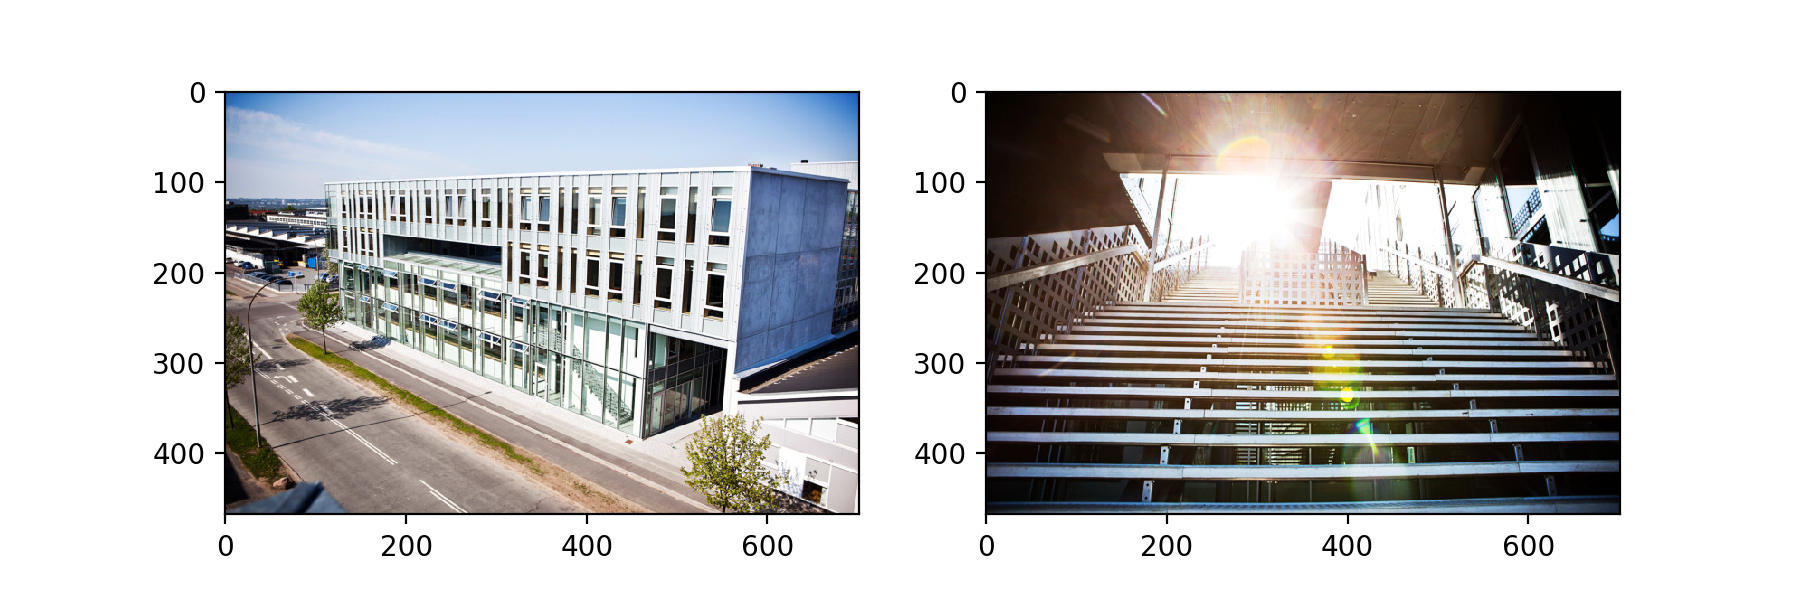

In [29]:
import imageio

def download_image(url):
    filename = url[url.rindex('/')+1:]
    try:
        with open(filename, 'rb') as fp:
            return imageio.imread(fp) / 255
    except FileNotFoundError:
        import urllib.request
        with open(filename, 'w+b') as fp, urllib.request.urlopen(url) as r:
            fp.write(r.read())
            return imageio.imread(fp) / 255
        
        
img_stairs = download_image('https://users-cs.au.dk/rav/ml/handins/h4/nygaard_stairs.jpg') 
img_facade = download_image('https://users-cs.au.dk/rav/ml/handins/h4/nygaard_facade.jpg')


fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].imshow(img_facade)
ax[1].imshow(img_stairs)
plt.show()

Each pixel of the above images are represented by three values: (R, G, B). By using clustering we can find groups of pixels that are similar, and represent each group of pixels just by its centroid. The code below implements this idea. Try run it (it might take some time to run)

Iterations	Cost
1 		 75899.45256985689


/Users/au597881/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


2 		 45351.48999251741
3 		 34705.76445174878
4 		 31791.643705546336
5 		 30626.041666741654


<IPython.core.display.Javascript object>


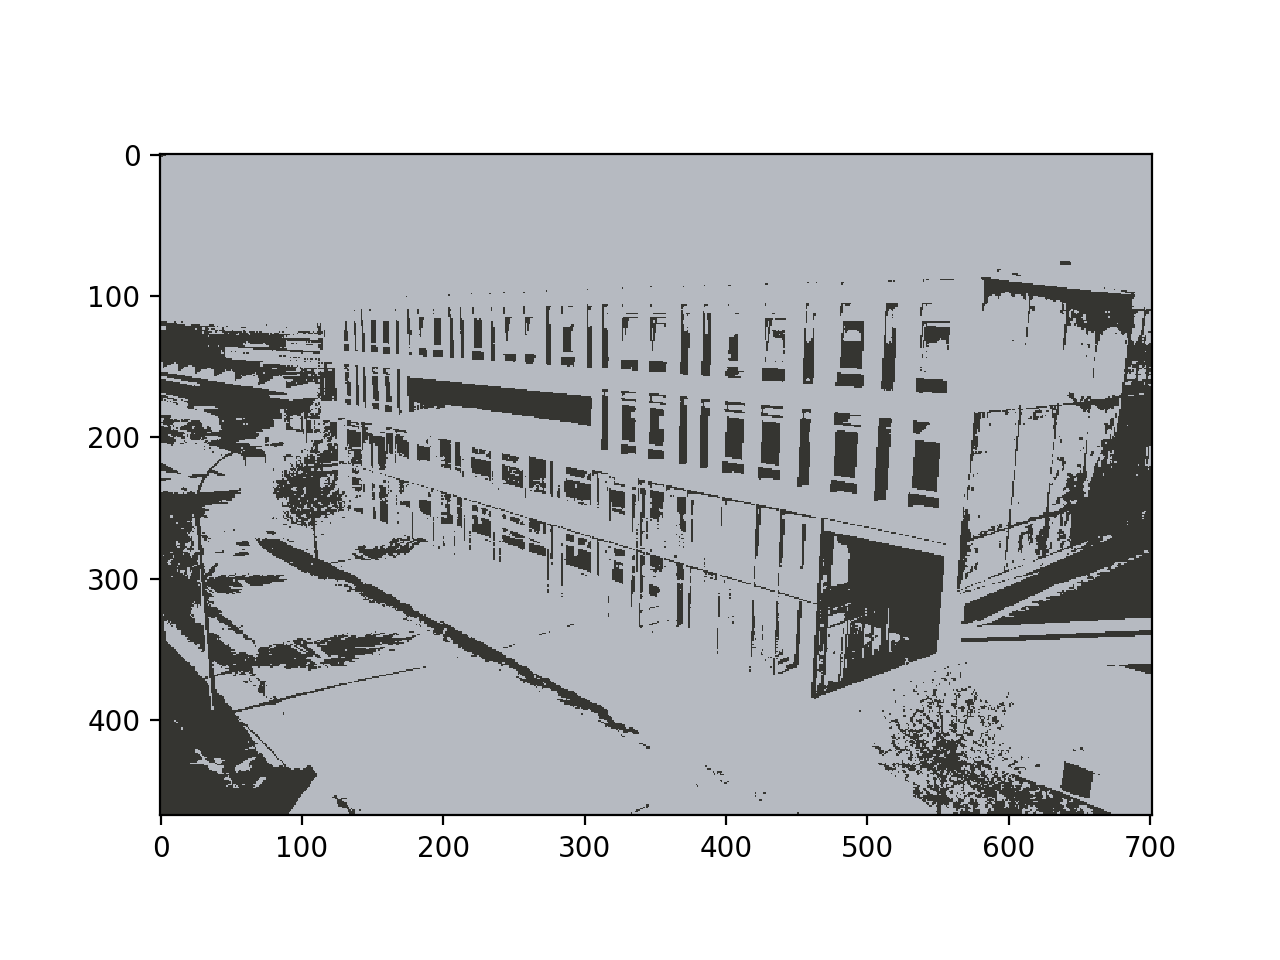

In [30]:
def compress_kmeans(im, k, T):
    height, width, depth = im.shape
    data = im.reshape((height * width, depth))
    clustering, centroids, score = lloyds_algorithm(data, k, 5)
    
    # make each entry of data to the value of it's cluster
    data_compressed = data
    
    for i in range(k): data_compressed[clustering == i] = centroids[i] 
    
    im_compressed = data_compressed.reshape((height, width, depth))
    plt.figure()
    plt.imshow(im_compressed)
    plt.show()

T = 10
k = 4
compress_kmeans(img_facade.copy(), k, T)

<b>Question 1</b>: Do you think higher/lower values of $k$ and $T$ gives "better" images? Try experiment with different values and make the best image you can. 

<b>Bonus Question: </b>(This exercise is not important for understanding the theory of the course) <br>
Try to modify the code to draw the image in each iteration. This should allow you to see how better a better clustering corresponds to selecting more representative colors. You can find inspiration to interactive plotting in the function `lloyds_algorithm_visualize` above. 

# Clustering digits
In previous weeks we did supervised learning on images of digits. In this exercise we will perform clustering on digits. Remember clustering can be considered a type of unsupervised learning. The main difference to what we did before is that  will attempt to find patterns in the data without using the labels.  

You can use the AUDigits if you want. The following code uses a data set of images called MNIST. They are almost identical. The only reason for using MNIST is that we can import it with just two lines of code. 

In [31]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

X = mnist_trainset.train_data.numpy().reshape((60000, 28*28))
y = mnist_trainset.train_labels.numpy()

print(X.shape)

(60000, 784)


The following code runs Lloyd's algorithm on 5000 images from the MNIST dataset. It then visualizes the found centroids. 

Iterations	Cost
1 		 3387067455.508419
2 		 3354584466.1890006
3 		 3354584466.1890006
(10, 784)
3354584466.1890006


/Users/au597881/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


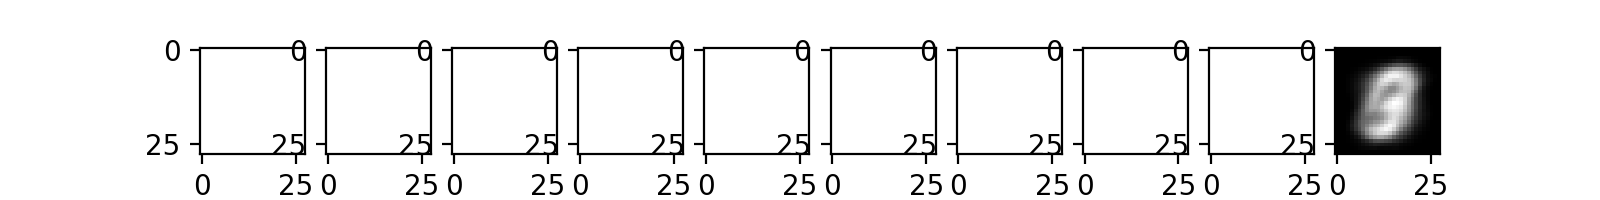

In [38]:
# One cluster for each digit
k = 10

# Run Lloyd's algorithm on 5000 images from the MNIST dataset. 
clustering, centroids, score = lloyds_algorithm(X[:1000], 10, 50)
print(centroids.shape)
print(score)
fig, ax = plt.subplots(1, k, figsize=(8, 1))

for i in range(k):
    ax[i].imshow(centroids[i].reshape(28, 28), cmap='gray')
plt.show()

<b>Question 1: </b>Why do the centroids look like images of digits?

<b>Question 2: </b>Is it possible that not all digits are present? Why could this happen?